Credit Scoring – Determining the creditworthiness of a person or a small, owner-operated business – provided by Utiva

This Capstone project was inspired from the Business Case of the just concluded Data Science Fellowship & Applied Analytics with Python Utiva 2021 which i participated in.

Data Sources:

The credit scoring dataset used in this project was provided by the organizers.

The analysis for this project will follow the CRISP-DM pipeline which are;

- Business Understanding
- Data Understanding
- Data Analysis and Preparation
- Data Modelling
- Results


1. Business Understanding

- Case Introduction

Credit scoring is a statistical analysis performed by lenders and financial institutions to determine the creditworthiness of a person or a small, owner-operated business. Credit scoring is used by lenders to help decide whether to extend or deny credit.

- The Goal

To analyze credit data to determine the credit worthiness of a person or a small, owner-operated business.

To help decide whether to extend or deny credit.

To determine the impact credit score have in many financial transactions, including mortgages, auto loans, credit cards, and private loans.


2. Data Understanding and Data Preprocessing

This stage involves loading the data and performing necessary data cleaning, preprocessing and feature engineering on the data to prepare it for analysis and modelling

#### Importing Necessary Libraries

In [1]:
# Data wrangling
import pandas as pd
import numpy as np
from collections import Counter

# Data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Model evaluation
from sklearn.model_selection import cross_val_score

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

#### Loading the datasets into a dataframe

In [2]:
train = pd.read_csv(r"/Users/DieuMerci/Desktop/Data Analytics:Science/Complete Python/Credit_Scoring_Utiva_Challenge Dataset/train.csv")

test = pd.read_csv(r"/Users/DieuMerci/Desktop/Data Analytics:Science/Complete Python/Credit_Scoring_Utiva_Challenge Dataset/test.csv")


In [3]:
sample_submission = pd.read_csv(r"/Users/DieuMerci/Desktop/Data Analytics:Science/Complete Python/Credit_Scoring_Utiva_Challenge Dataset/sample_submission.csv")

sample_submission

,Id,default
0,2,0
1,4,1
2,6,1
3,13,1
4,18,1
...,...,...
287,992,1
288,993,1
289,995,1
290,996,1


In [4]:
train.shape, test.shape, sample_submission.shape

((708, 24), (292, 23), (292, 2))

In [5]:
train.head(3)

,Unnamed: 0,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,...,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job,gender,Id
0,0,-43.0,6,critical,radio/tv,1169,NaN,13 years,4,single,...,none,own,2,0,1,2.349340e+09,yes,skilled employee,male,0
1,1,75.0,48,repaid,radio/tv,5951,89.0,2 years,2,NaN,...,none,own,1,1,1,NaN,yes,skilled employee,female,1
2,3,-32.0,42,repaid,furniture,7882,9.0,5 years,2,single,...,none,for free,1,0,2,NaN,yes,skilled employee,male,3


In [6]:
train.tail(3)

,Unnamed: 0,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,...,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job,gender,Id
705,994,NaN,12,repaid,car (new),2390,NaN,17 years,4,single,...,none,own,1,0,1,2.341832e+09,yes,skilled employee,male,994
706,997,NaN,12,repaid,radio/tv,804,44.0,13 years,4,single,...,none,own,1,0,1,NaN,yes,skilled employee,male,997
707,998,-18.0,45,repaid,radio/tv,1845,31.0,2 years,4,single,...,none,for free,1,1,1,2.342257e+09,yes,skilled employee,male,998


In [7]:
sample_submission.head()

,Id,default
0,2,0
1,4,1
2,6,1
3,13,1
4,18,1


#### Data Preprocessing and Data Cleaning

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708 entries, 0 to 707
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            708 non-null    int64  
 1   checking_balance      427 non-null    float64
 2   months_loan_duration  708 non-null    int64  
 3   credit_history        708 non-null    object 
 4   purpose               708 non-null    object 
 5   amount                708 non-null    int64  
 6   savings_balance       579 non-null    float64
 7   employment_length     661 non-null    object 
 8   installment_rate      708 non-null    int64  
 9   personal_status       498 non-null    object 
 10  other_debtors         708 non-null    object 
 11  residence_history     621 non-null    object 
 12  property              708 non-null    object 
 13  age                   708 non-null    int64  
 14  installment_plan      708 non-null    object 
 15  housing               7

In [9]:
train.describe()

,Unnamed: 0,checking_balance,months_loan_duration,amount,savings_balance,installment_rate,age,existing_credits,default,dependents,telephone,Id
count,708.000000,427.000000,708.000000,708.000000,579.000000,708.000000,708.000000,708.000000,708.000000,708.000000,3.000000e+02,708.000000
mean,489.059322,103.133489,20.772599,3237.413842,789.058722,2.966102,35.877119,1.423729,0.298023,1.153955,2.344898e+09,489.059322
std,288.583071,220.425812,11.957515,2740.753878,2997.126937,1.116411,11.556534,0.595696,0.457713,0.361161,3.043729e+06,288.583071
min,0.000000,-50.000000,4.000000,250.000000,0.000000,1.000000,19.000000,1.000000,0.000000,1.000000,2.340000e+09,0.000000
25%,236.500000,-21.000000,12.000000,1374.000000,32.000000,2.000000,27.000000,1.000000,0.000000,1.000000,2.341990e+09,236.500000
50%,482.500000,26.000000,18.000000,2309.000000,65.000000,3.000000,33.000000,1.000000,0.000000,1.000000,2.344832e+09,482.500000
75%,738.250000,130.500000,24.000000,3960.500000,205.000000,4.000000,42.000000,2.000000,1.000000,1.000000,2.347731e+09,738.250000
max,998.000000,999.000000,72.000000,18424.000000,19970.000000,4.000000,75.000000,4.000000,1.000000,2.000000,2.349986e+09,998.000000


In [10]:
print(train.columns.values)

['Unnamed: 0' 'checking_balance' 'months_loan_duration' 'credit_history'
 'purpose' 'amount' 'savings_balance' 'employment_length'
 'installment_rate' 'personal_status' 'other_debtors' 'residence_history'
 'property' 'age' 'installment_plan' 'housing' 'existing_credits'
 'default' 'dependents' 'telephone' 'foreign_worker' 'job' 'gender' 'Id']


In [11]:
train.columns

Index(['Unnamed: 0', 'checking_balance', 'months_loan_duration',
       'credit_history', 'purpose', 'amount', 'savings_balance',
       'employment_length', 'installment_rate', 'personal_status',
       'other_debtors', 'residence_history', 'property', 'age',
       'installment_plan', 'housing', 'existing_credits', 'default',
       'dependents', 'telephone', 'foreign_worker', 'job', 'gender', 'Id'],
      dtype='object')

In [12]:
train.isnull().sum().sort_values(ascending = False)

telephone               408
checking_balance        281
personal_status         210
savings_balance         129
residence_history        87
employment_length        47
Unnamed: 0                0
housing                   0
gender                    0
job                       0
foreign_worker            0
dependents                0
default                   0
existing_credits          0
property                  0
installment_plan          0
age                       0
other_debtors             0
installment_rate          0
amount                    0
purpose                   0
credit_history            0
months_loan_duration      0
Id                        0
dtype: int64

In [13]:
train.info()
print('_'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708 entries, 0 to 707
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            708 non-null    int64  
 1   checking_balance      427 non-null    float64
 2   months_loan_duration  708 non-null    int64  
 3   credit_history        708 non-null    object 
 4   purpose               708 non-null    object 
 5   amount                708 non-null    int64  
 6   savings_balance       579 non-null    float64
 7   employment_length     661 non-null    object 
 8   installment_rate      708 non-null    int64  
 9   personal_status       498 non-null    object 
 10  other_debtors         708 non-null    object 
 11  residence_history     621 non-null    object 
 12  property              708 non-null    object 
 13  age                   708 non-null    int64  
 14  installment_plan      708 non-null    object 
 15  housing               7

In [14]:
train['employment_length'].unique()

array(['13 years', '2 years', '5 years', '4 years', nan, '6 months',
       '5 months', '3 years', '1 years', '17 years', '3 months',
       '9 years', '4 months', '10 months', '11 years', '7 months',
       '19 years', '7 years', '14 years', '1 months', '18 years',
       '16 years', '15 years', '6 years', '8 years', '12 years',
       '2 months', '0 months', '9 months', '10 years', '8 months',
       '11 months'], dtype=object)

In [15]:
def emp_length_1(x):
    x = str(x).split()
    if x[0]== 'nan':
        return 0
    else:
        if x[1] == 'years':
            return int(x[0])*12
        else: 
            return int(x[0])

In [16]:
train['emp_length_1'] = train['employment_length'].apply(emp_length_1)

In [17]:
train['emp_length_1']

0      156
1       24
2       60
3       24
4       24
      ... 
703      0
704    156
705    204
706    156
707     24
Name: emp_length_1, Length: 708, dtype: int64

In [18]:
train['credit_history'].value_counts()

repaid                    373
critical                  209
delayed                    66
fully repaid this bank     34
fully repaid               26
Name: credit_history, dtype: int64

#### Feature Engineering

In [19]:
def merge_cred_hist(x):
    if x == "fully repaid this bank" or x == "fully repaid":
        return "fully repaid"
    else:
        return x

In [20]:
train['credit_history_1'] = train['credit_history'].apply(merge_cred_hist)

In [21]:
train['credit_history_1'].value_counts()

repaid          373
critical        209
delayed          66
fully repaid     60
Name: credit_history_1, dtype: int64

In [22]:
train[['credit_history_1', 'default']].groupby(['credit_history_1'], as_index = False).mean().sort_values(by = 'default', 
                                                                                                          ascending = False)

,credit_history_1,default
2,fully repaid,0.616667
1,delayed,0.333333
3,repaid,0.313673
0,critical,0.167464


In [23]:
train['purpose'].value_counts()

radio/tv               199
car (new)              177
furniture              114
business                75
car (used)              72
education               37
repairs                 16
domestic appliances      8
others                   7
retraining               3
Name: purpose, dtype: int64

In [24]:
def merge_purpose(x):
    if x == "repairs" or x == "domestic appliances" or x == "others" or x == "retraining":
        return "others"
    else:
        return x

In [25]:
train['purpose_1'] = train['purpose'].apply(merge_purpose)

In [26]:
train['purpose_1'].value_counts()

radio/tv      199
car (new)     177
furniture     114
business       75
car (used)     72
education      37
others         34
Name: purpose_1, dtype: int64

In [27]:
train['residence_history'].value_counts()

2 years      31
8 months     28
0 months     27
1 years      25
3 years      24
4 years      23
1 months     20
13 years     19
9 months     19
18 years     18
15 years     18
2 months     18
11 months    18
3 months     18
8 years      18
10 years     18
11 years     17
14 years     16
16 years     16
4 months     15
23 years     15
22 years     15
5 months     15
7 months     14
5 years      14
24 years     14
10 months    14
6 months     14
17 years     13
20 years     13
7 years      13
12 years     13
6 years      12
21 years     12
19 years     12
9 years      12
Name: residence_history, dtype: int64

In [28]:
train['residence_history'].values

array(['6 years', '5 months', '13 years', '8 years', '3 months',
       '24 years', '10 months', nan, '10 years', nan, '19 years',
       '0 months', '7 years', '3 years', '7 months', '3 years', '1 years',
       '16 years', nan, '3 months', '1 years', '6 months', '2 years',
       '3 months', '20 years', '6 months', '2 years', '11 months',
       '8 months', nan, '14 years', '16 years', '21 years', '5 years',
       '8 years', '6 months', '8 years', '0 months', '9 months',
       '2 months', '10 months', nan, '24 years', '9 months', nan,
       '8 months', '7 months', '15 years', nan, '11 years', '5 years',
       '0 months', '18 years', '19 years', '8 months', nan, '22 years',
       '13 years', '3 months', '6 months', '23 years', '20 years',
       '3 years', nan, '3 years', '18 years', '13 years', '0 months',
       '2 years', '1 years', '13 years', '2 years', '20 years',
       '20 years', '2 months', '10 years', '20 years', '23 years',
       '23 years', '4 months', '3 years', '5

In [29]:
def res_hist_1(x):
    x = str(x).split()
    if x[0]== 'nan':
        return 0
    else:
        if x[1] == 'years':
            return int(x[0])*12
        else: 
            return int(x[0])

In [30]:
train['residence_history_1'] = train['residence_history'].apply(res_hist_1)

In [31]:
train['residence_history_1'].values

array([ 72,   5, 156,  96,   3, 288,  10,   0, 120,   0, 228,   0,  84,
        36,   7,  36,  12, 192,   0,   3,  12,   6,  24,   3, 240,   6,
        24,  11,   8,   0, 168, 192, 252,  60,  96,   6,  96,   0,   9,
         2,  10,   0, 288,   9,   0,   8,   7, 180,   0, 132,  60,   0,
       216, 228,   8,   0, 264, 156,   3,   6, 276, 240,  36,   0,  36,
       216, 156,   0,  24,  12, 156,  24, 240, 240,   2, 120, 240, 276,
       276,   4,  36,  60, 288,   8,  11,   5,   0,   0,  24, 144,  48,
         9,   9, 216,  24,   3,   8,   6,   1,   2,  24, 168, 132,   6,
         1,  24,   5,   0,   8,   4, 252,   0, 216, 132, 204, 264,  84,
       240, 288, 216,   0,  24, 288,   8,   0, 192, 180,  48,   0,  11,
         3,   0,   0, 168,   2, 120,   0,  10,   3, 120,   2,  24,   0,
        36, 120,   8,   0, 132,  24,   0, 132, 132,  12,  24, 156,   0,
        60,   2,   7, 108, 216,  12,   0,  10,  72, 168,   1, 192,   4,
         4, 252,  11,   0, 276,   0,   0,  10,   6,   0,  12,  1

In [32]:
train['residence_history_1'].value_counts()

0      114
24      31
8       28
12      25
36      24
48      23
1       20
156     19
9       19
216     18
180     18
2       18
11      18
3       18
96      18
120     18
132     17
168     16
192     16
4       15
276     15
264     15
5       15
7       14
60      14
288     14
10      14
6       14
204     13
240     13
84      13
144     13
72      12
252     12
228     12
108     12
Name: residence_history_1, dtype: int64

In [33]:
train.columns

Index(['Unnamed: 0', 'checking_balance', 'months_loan_duration',
       'credit_history', 'purpose', 'amount', 'savings_balance',
       'employment_length', 'installment_rate', 'personal_status',
       'other_debtors', 'residence_history', 'property', 'age',
       'installment_plan', 'housing', 'existing_credits', 'default',
       'dependents', 'telephone', 'foreign_worker', 'job', 'gender', 'Id',
       'emp_length_1', 'credit_history_1', 'purpose_1', 'residence_history_1'],
      dtype='object')

In [34]:
train['telephone'].isnull().sum()

408

In [35]:
def engr_tel (x): 
    if x > 0:
        return 0
    else:
        return 1

In [36]:
train['tel_1'] = train['telephone'].apply(engr_tel)

In [37]:
train[['tel_1','telephone']]

,tel_1,telephone
0,0,2.349340e+09
1,1,NaN
2,1,NaN
3,0,2.345788e+09
4,0,2.349962e+09
...,...,...
703,0,2.341421e+09
704,1,NaN
705,0,2.341832e+09
706,1,NaN


In [38]:
train.drop(['Unnamed: 0', 'credit_history', 'purpose', 
       'employment_length', 'residence_history', 'telephone', 'Id'], axis = 1, inplace = True)

In [39]:
train.columns

Index(['checking_balance', 'months_loan_duration', 'amount', 'savings_balance',
       'installment_rate', 'personal_status', 'other_debtors', 'property',
       'age', 'installment_plan', 'housing', 'existing_credits', 'default',
       'dependents', 'foreign_worker', 'job', 'gender', 'emp_length_1',
       'credit_history_1', 'purpose_1', 'residence_history_1', 'tel_1'],
      dtype='object')

In [40]:
train.isnull().sum()

checking_balance        281
months_loan_duration      0
amount                    0
savings_balance         129
installment_rate          0
personal_status         210
other_debtors             0
property                  0
age                       0
installment_plan          0
housing                   0
existing_credits          0
default                   0
dependents                0
foreign_worker            0
job                       0
gender                    0
emp_length_1              0
credit_history_1          0
purpose_1                 0
residence_history_1       0
tel_1                     0
dtype: int64

In [41]:
train['checking_balance'].describe()

count    427.000000
mean     103.133489
std      220.425812
min      -50.000000
25%      -21.000000
50%       26.000000
75%      130.500000
max      999.000000
Name: checking_balance, dtype: float64

In [42]:
train.shape

(708, 22)

In [43]:
train['checking_balance'].fillna(-9999, inplace = True)

In [44]:
train[train['savings_balance'] == 0]

,checking_balance,months_loan_duration,amount,savings_balance,installment_rate,personal_status,other_debtors,property,age,installment_plan,...,default,dependents,foreign_worker,job,gender,emp_length_1,credit_history_1,purpose_1,residence_history_1,tel_1
248,199.0,13,882,0.0,4,single,guarantor,real estate,23,none,...,0,1,yes,skilled employee,male,1,critical,radio/tv,276,1
266,-9999.0,18,3850,0.0,3,single,none,other,27,none,...,0,1,yes,skilled employee,male,60,critical,car (used),0,1
422,-41.0,18,2039,0.0,1,NaN,none,real estate,20,bank,...,1,1,yes,skilled employee,female,36,repaid,furniture,108,1
436,-9999.0,36,3349,0.0,4,NaN,none,other,28,none,...,1,1,yes,mangement self-employed,female,12,repaid,furniture,5,0
516,-9999.0,18,1505,0.0,4,single,none,unknown/none,32,none,...,0,1,yes,mangement self-employed,male,24,repaid,radio/tv,3,0
591,-36.0,21,1602,0.0,4,married,none,other,30,none,...,0,1,yes,skilled employee,male,144,critical,car (new),12,0
597,-39.0,12,1082,0.0,4,single,none,other,48,bank,...,1,1,yes,skilled employee,male,36,fully repaid,car (new),132,1


In [45]:
train['savings_balance'].fillna(-9999, inplace = True)

In [46]:
train['personal_status'].value_counts()

single      401
married      64
divorced     33
Name: personal_status, dtype: int64

In [47]:
train['personal_status'].fillna("missing", inplace = True)

In [48]:
train.isnull().sum()

checking_balance        0
months_loan_duration    0
amount                  0
savings_balance         0
installment_rate        0
personal_status         0
other_debtors           0
property                0
age                     0
installment_plan        0
housing                 0
existing_credits        0
default                 0
dependents              0
foreign_worker          0
job                     0
gender                  0
emp_length_1            0
credit_history_1        0
purpose_1               0
residence_history_1     0
tel_1                   0
dtype: int64

In [49]:
train.shape

(708, 22)

In [50]:
from sklearn.preprocessing import OneHotEncoder

In [51]:
df_obj = train.select_dtypes(include = ['object'])
drop_enc = OneHotEncoder(drop = 'first') .fit(df_obj)

In [52]:
drop_enc = drop_enc.transform(df_obj)

In [53]:
!pip install category_encoders

In [54]:
from category_encoders.one_hot import OneHotEncoder

In [55]:
cols_encoding = train.select_dtypes(include='object').columns
ohe = OneHotEncoder(cols=cols_encoding)

In [56]:
X = train.drop('default', axis =1)
y = train['default']

In [57]:
encoded = ohe.fit_transform(X)

encoded

,checking_balance,months_loan_duration,amount,savings_balance,installment_rate,personal_status_1,personal_status_2,personal_status_3,personal_status_4,other_debtors_1,...,credit_history_1_4,purpose_1_1,purpose_1_2,purpose_1_3,purpose_1_4,purpose_1_5,purpose_1_6,purpose_1_7,residence_history_1,tel_1
0,-43.0,6,1169,-9999.0,4,1,0,0,0,1,...,0,1,0,0,0,0,0,0,72,0
1,75.0,48,5951,89.0,2,0,1,0,0,1,...,0,1,0,0,0,0,0,0,5,1
2,-32.0,42,7882,9.0,2,1,0,0,0,0,...,0,0,1,0,0,0,0,0,156,1
3,-9999.0,36,9055,-9999.0,2,1,0,0,0,1,...,0,0,0,1,0,0,0,0,96,0
4,169.0,36,6948,57.0,2,1,0,0,0,1,...,0,0,0,0,1,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,-12.0,24,6579,21.0,4,1,0,0,0,1,...,0,0,0,0,1,0,0,0,10,0
704,97.0,24,1743,40.0,4,1,0,0,0,1,...,0,1,0,0,0,0,0,0,4,1
705,-9999.0,12,2390,-9999.0,4,1,0,0,0,1,...,0,0,0,0,0,1,0,0,12,0
706,-9999.0,12,804,44.0,4,1,0,0,0,1,...,0,1,0,0,0,0,0,0,192,1


In [58]:
encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708 entries, 0 to 707
Data columns (total 47 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   checking_balance      708 non-null    float64
 1   months_loan_duration  708 non-null    int64  
 2   amount                708 non-null    int64  
 3   savings_balance       708 non-null    float64
 4   installment_rate      708 non-null    int64  
 5   personal_status_1     708 non-null    int64  
 6   personal_status_2     708 non-null    int64  
 7   personal_status_3     708 non-null    int64  
 8   personal_status_4     708 non-null    int64  
 9   other_debtors_1       708 non-null    int64  
 10  other_debtors_2       708 non-null    int64  
 11  other_debtors_3       708 non-null    int64  
 12  property_1            708 non-null    int64  
 13  property_2            708 non-null    int64  
 14  property_3            708 non-null    int64  
 15  property_4            7

##### Cleaning Test dataset

In [60]:
def emp_length_1(x):
    x = str(x).split()
    if x[0]== 'nan':
        return 0
    else:
        if x[1] == 'years':
            return int(x[0])*12
        else: 
            return int(x[0])

In [61]:
test['emp_length_1'] = test['employment_length'].apply(emp_length_1)

In [62]:
test['emp_length_1']

0       60
1       36
2      132
3      192
4      204
      ... 
287     72
288      0
289     48
290     36
291      0
Name: emp_length_1, Length: 292, dtype: int64

In [64]:
test['credit_history_1'] = test['credit_history'].apply(merge_cred_hist)

In [65]:
test['purpose_1'] = test['purpose'].apply(merge_purpose)

In [66]:
test['residence_history_1'] = test['residence_history'].apply(res_hist_1)

In [67]:
 test['tele_1'] = test['telephone'].apply(engr_tel)

In [68]:
test.drop(['Unnamed: 0', 'credit_history', 'purpose', 
       'employment_length', 'residence_history', 'telephone', 'Id'], axis = 1, inplace = True)

In [69]:
test.columns

Index(['checking_balance', 'months_loan_duration', 'amount', 'savings_balance',
       'installment_rate', 'personal_status', 'other_debtors', 'property',
       'age', 'installment_plan', 'housing', 'existing_credits', 'dependents',
       'foreign_worker', 'job', 'gender', 'emp_length_1', 'credit_history_1',
       'purpose_1', 'residence_history_1', 'tele_1'],
      dtype='object')

In [70]:
test.isnull().sum()

checking_balance        113
months_loan_duration      0
amount                    0
savings_balance          54
installment_rate          0
personal_status         100
other_debtors             0
property                  0
age                       0
installment_plan          0
housing                   0
existing_credits          0
dependents                0
foreign_worker            0
job                       0
gender                    0
emp_length_1              0
credit_history_1          0
purpose_1                 0
residence_history_1       0
tele_1                    0
dtype: int64

In [71]:
test['checking_balance'].fillna(-9999, inplace = True)

In [72]:
test['savings_balance'].fillna(-9999, inplace = True)

In [73]:
test['personal_status'].fillna("missing", inplace = True)

In [74]:
encoded_test = ohe.transform(test)

encoded_test

,checking_balance,months_loan_duration,amount,savings_balance,installment_rate,personal_status_1,personal_status_2,personal_status_3,personal_status_4,other_debtors_1,...,credit_history_1_4,purpose_1_1,purpose_1_2,purpose_1_3,purpose_1_4,purpose_1_5,purpose_1_6,purpose_1_7,residence_history_1,tele_1
0,-9999.0,12,2096,24.0,2,1,0,0,0,1,...,0,0,0,1,0,0,0,0,48,1
1,-23.0,24,4870,43.0,3,1,0,0,0,1,...,1,0,0,0,0,1,0,0,156,1
2,-9999.0,24,2835,761.0,3,1,0,0,0,1,...,0,0,1,0,0,0,0,0,144,1
3,-36.0,24,1199,32.0,4,1,0,0,0,1,...,0,0,0,0,0,1,0,0,288,1
4,83.0,24,12579,16.0,4,0,1,0,0,1,...,0,0,0,0,1,0,0,0,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,-37.0,18,1936,-9999.0,2,0,0,0,1,1,...,0,1,0,0,0,0,0,0,252,1
288,-18.0,36,3959,75.0,4,1,0,0,0,1,...,0,0,1,0,0,0,0,0,36,0
289,-9999.0,12,1736,48.0,3,0,1,0,0,1,...,0,0,1,0,0,0,0,0,240,1
290,-30.0,30,3857,20.0,4,0,0,1,0,1,...,0,0,0,0,1,0,0,0,60,0


In [75]:
encoded_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 47 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   checking_balance      292 non-null    float64
 1   months_loan_duration  292 non-null    int64  
 2   amount                292 non-null    int64  
 3   savings_balance       292 non-null    float64
 4   installment_rate      292 non-null    int64  
 5   personal_status_1     292 non-null    int64  
 6   personal_status_2     292 non-null    int64  
 7   personal_status_3     292 non-null    int64  
 8   personal_status_4     292 non-null    int64  
 9   other_debtors_1       292 non-null    int64  
 10  other_debtors_2       292 non-null    int64  
 11  other_debtors_3       292 non-null    int64  
 12  property_1            292 non-null    int64  
 13  property_2            292 non-null    int64  
 14  property_3            292 non-null    int64  
 15  property_4            2

3. Exploratory Data Analysis

After cleaning the data and preparing it, Exploratory Data Analysis (EDA) will be performed to gather insights that will be useful for the model to learn from the data to help improve performance of the model

<AxesSubplot:xlabel='credit_history_1', ylabel='Count'>

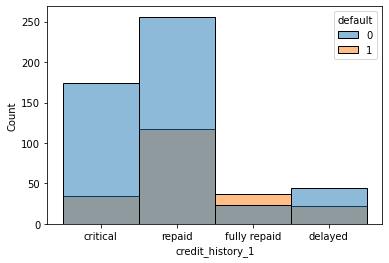

In [76]:
sns.histplot(train, x = 'credit_history_1', hue = 'default')

<AxesSubplot:xlabel='checking_balance', ylabel='Count'>

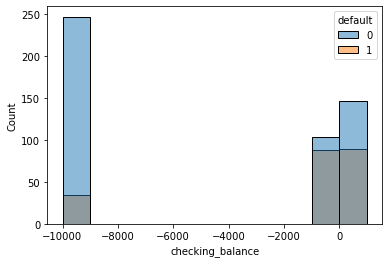

In [77]:
sns.histplot(train, x = 'checking_balance', hue = 'default')

<AxesSubplot:>

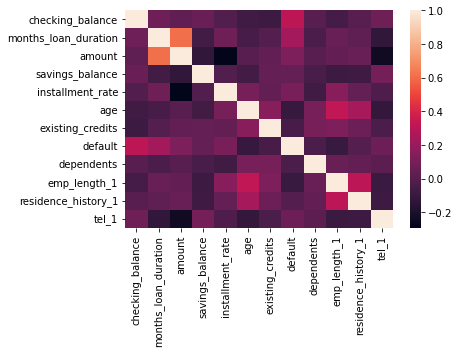

In [78]:
sns.heatmap(train.corr())

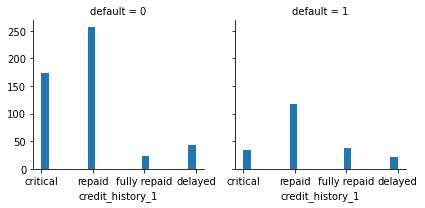

In [79]:
g = sns.FacetGrid(train, col = 'default')
g.map(plt.hist, 'credit_history_1', bins = 20)

#### Data Modelling

This is the phase where a Machine learn model is trained using all the explanatory features to make prediction for the target variable.

- Importing libraries required for modelling


In [82]:
# Machine learning models
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

- Creating a test Set to be used to select a baseline model

In [83]:
# Split-out test dataset

random_state = 42
test_size = 0.20

X_train, X_test, y_train, y_test = train_test_split(encoded, y, test_size=0.2, random_state=42)

In [84]:
X_train.shape, X_test.shape

((566, 47), (142, 47))

In [85]:
model = RandomForestClassifier()

In [86]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [87]:
model.score(X_train, y_train)

1.0

In [88]:
predict = model.predict(X_test)

In [89]:
print (classification_report(predict, y_test))

              precision    recall  f1-score   support

           0       0.90      0.79      0.84       120
           1       0.32      0.55      0.41        22

    accuracy                           0.75       142
   macro avg       0.61      0.67      0.63       142
weighted avg       0.81      0.75      0.78       142



In [90]:
model.fit(encoded, y)

RandomForestClassifier()

In [91]:
model.score(encoded,y)

1.0

In [92]:
predict = model.predict(encoded_test)

predict

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])